In [2]:
# 1) Carga el dataset "clickbait_dataset.csv"
import pandas as pd
df= pd.read_csv('clickbait_dataset.csv')
df.head()

,headline,clickbait
0,This Is What $1 USD Gets You In Food All Aroun...,1
1,Make These Easy Chicken Fajita Quesadillas At ...,1
2,"The Hardest ""Walking Dead"" Video Game Quiz You...",1
3,34 Online Shops Based In The Southeast You Sho...,1
4,US and France to work together for new Iran sa...,0


In [3]:
#2) Crea una función de preprocesamiento de texto adecuada al texto que se encuentra en la columna de "headline"
#Importamos las librerias necesarias.
import nltk
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
# Tomamos las stop words en inglés
stop_words_en= stopwords.words('English')
from nltk.stem.wordnet import WordNetLemmatizer
# Tomamos el lemmatizer
lemmatizer = WordNetLemmatizer()
def funcion_preprocesamiento(texto):
    # Convertimos el texto en minusculas
    texto = texto.lower()
    # Eliminamos los caracteres que especifiquemos con ayuda de regex
    texto = re.sub(r'([^A-Za-z \t])|(\d)','',texto)
    # Tokenizamos el texto
    texto = word_tokenize(texto)
    # Eliminamos las stop words
    texto = [palabra for palabra in texto if palabra not in stop_words_en]
    # Lemmatizamos el texto
    texto = [lemmatizer.lemmatize(palabra) for palabra in texto]
    # Unimos el texto
    texto = ' '.join(texto)
    return texto

In [4]:
# 3) Aplica tu funcion sobre la columna "headline"
df['headline_cleen'] = df['headline'].apply(funcion_preprocesamiento)
df

,headline,clickbait,headline_cleen
0,This Is What $1 USD Gets You In Food All Aroun...,1,usd get food around world
1,Make These Easy Chicken Fajita Quesadillas At ...,1,make easy chicken fajita quesadilla home
2,"The Hardest ""Walking Dead"" Video Game Quiz You...",1,hardest walking dead video game quiz youll eve...
3,34 Online Shops Based In The Southeast You Sho...,1,online shop based southeast shopping
4,US and France to work together for new Iran sa...,0,u france work together new iran sanction
...,...,...,...
31995,"Jennifer Lopez Was Perfect On Jimmy Fallon's ""...",1,jennifer lopez perfect jimmy fallons ew
31996,Basketball: UAAP opens 2008-2009 season with n...,0,basketball uaap open season new rule
31997,United States charges eleven in credit card fr...,0,united state charge eleven credit card fraud case
31998,40 Of The Most Powerful Obama Moments Of 2015,1,powerful obama moment


In [5]:
# 4) En la columna de "clickbait", cambia los 1 por la palabra "clickbait" y los 0 por "non-clickbait"
# En este caso hacemos uso de la función replace para cambiar los valores de la columna clickbait, que básicamente te dice
# que si es 1 es clickbait y si es 0 es non-clickbait.
df['clickbait'] = df['clickbait'].replace({1:'clickbait',0:'non-clickbait'})
df

,headline,clickbait,headline_cleen
0,This Is What $1 USD Gets You In Food All Aroun...,clickbait,usd get food around world
1,Make These Easy Chicken Fajita Quesadillas At ...,clickbait,make easy chicken fajita quesadilla home
2,"The Hardest ""Walking Dead"" Video Game Quiz You...",clickbait,hardest walking dead video game quiz youll eve...
3,34 Online Shops Based In The Southeast You Sho...,clickbait,online shop based southeast shopping
4,US and France to work together for new Iran sa...,non-clickbait,u france work together new iran sanction
...,...,...,...
31995,"Jennifer Lopez Was Perfect On Jimmy Fallon's ""...",clickbait,jennifer lopez perfect jimmy fallons ew
31996,Basketball: UAAP opens 2008-2009 season with n...,non-clickbait,basketball uaap open season new rule
31997,United States charges eleven in credit card fr...,non-clickbait,united state charge eleven credit card fraud case
31998,40 Of The Most Powerful Obama Moments Of 2015,clickbait,powerful obama moment


In [6]:
#Partimos datos para construir modelo
from sklearn.model_selection import train_test_split
# Variables de entrenamiento y prueba.
X = df['headline_cleen']
y = df['clickbait']
# Dividimos los datos en entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=101)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,1), min_df=3)
X_train_vectorized = tfidf.fit_transform(X_train)
X_test_vectorized = tfidf.transform(X_test)


# Árboles de Decisión

In [13]:
# Arboles de decisión
from sklearn.tree import DecisionTreeClassifier
modelo_arbol = DecisionTreeClassifier()
modelo_arbol.fit(X_train_vectorized, y_train)

DecisionTreeClassifier()

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = modelo_arbol.predict(X_test_vectorized)
print(classification_report(y_test, y_pred))


               precision    recall  f1-score   support

    clickbait       0.85      0.94      0.89      4005
non-clickbait       0.93      0.84      0.88      3995

     accuracy                           0.89      8000
    macro avg       0.89      0.89      0.89      8000
 weighted avg       0.89      0.89      0.89      8000



<Axes: >

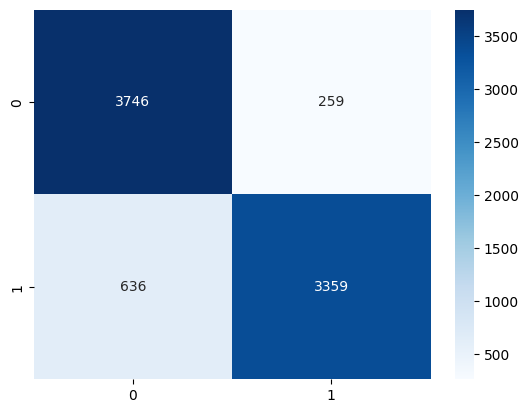

In [15]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')

# Modelo de Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
modelo_rf = RandomForestClassifier()
modelo_rf.fit(X_train_vectorized, y_train)

RandomForestClassifier()

In [17]:
y_pred_1 = modelo_rf.predict(X_test_vectorized)
print(classification_report(y_test, y_pred_1))

               precision    recall  f1-score   support

    clickbait       0.90      0.95      0.92      4005
non-clickbait       0.95      0.89      0.92      3995

     accuracy                           0.92      8000
    macro avg       0.92      0.92      0.92      8000
 weighted avg       0.92      0.92      0.92      8000



<Axes: >

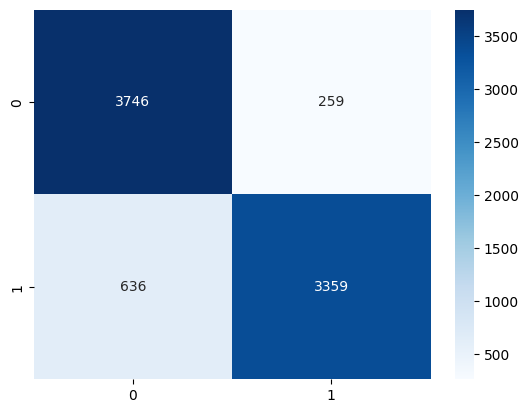

In [18]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')

In [20]:
from sklearn.ensemble import RandomForestClassifier
modelo_rf_2= RandomForestClassifier(n_jobs=-1, n_estimators=1000)
modelo_rf_2.fit(X_train_vectorized, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1)

In [21]:
# Clasificación reporte
y_pred_2 = modelo_rf_2.predict(X_test_vectorized)
print(classification_report(y_test, y_pred_2))

               precision    recall  f1-score   support

    clickbait       0.90      0.95      0.92      4005
non-clickbait       0.95      0.89      0.92      3995

     accuracy                           0.92      8000
    macro avg       0.92      0.92      0.92      8000
 weighted avg       0.92      0.92      0.92      8000



In [ ]:
modelo_rf_4= RandomForestClassifier(n_jobs=-1,n_estimators=1000, criterion='entropy')
modelo_rf_4.fit(X_train_vectorized, y_train)


In [ ]:
# Clasificación reporte
y_pred_4 = modelo_rf_4.predict(X_test_vectorized)
print(classification_report(y_test, y_pred_4))

In [ ]:
modelo_rf_3= RandomForestClassifier(n_estimators=50)
modelo_rf_3.fit(X_train_vectorized, y_train)
# Clasificación reporte
y_pred_3 = modelo_rf_3.predict(X_test_vectorized)
print(classification_report(y_test, y_pred_3))

# Regresión Logística

In [7]:
#importamos librerias para metricas y visualizacion
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

               precision    recall  f1-score   support

    clickbait       0.96      0.94      0.95      6419
non-clickbait       0.94      0.96      0.95      6381

     accuracy                           0.95     12800
    macro avg       0.95      0.95      0.95     12800
 weighted avg       0.95      0.95      0.95     12800



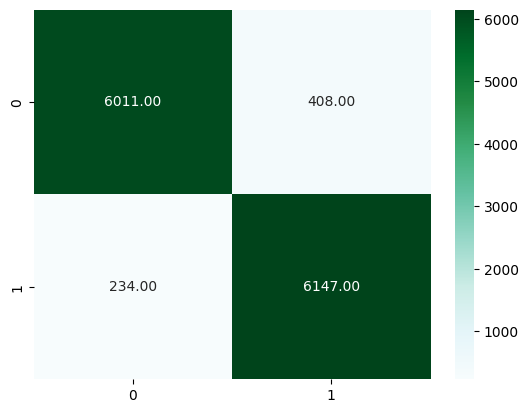

In [8]:
#Construimos y evaluamos regresion logistica base
from sklearn.linear_model import LogisticRegression
# Creamos una instancia de LogisticRegression
model= LogisticRegression()
# Entrenamos el modelo
model.fit(X_train_vectorized, y_train)
# Predecimos los valores correspondientes.
y_pred = model.predict(X_test_vectorized)
# Creamos la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='BuGn', fmt='.2f')
# Imprimimos el reporte de clasificación
print(classification_report(y_test, y_pred))

# Máquina de Soporte Vectorial

               precision    recall  f1-score   support

    clickbait       0.97      0.95      0.96      6419
non-clickbait       0.95      0.97      0.96      6381

     accuracy                           0.96     12800
    macro avg       0.96      0.96      0.96     12800
 weighted avg       0.96      0.96      0.96     12800



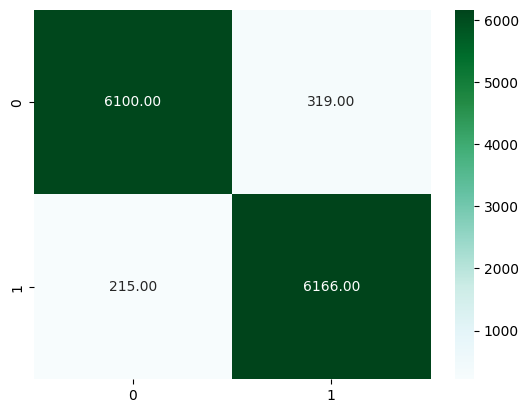

In [9]:
#Construimos y evaluamos maquinas de soporte vectorial base
from sklearn.svm import SVC
# Creamos una instancia de Support vector classifier
model= SVC()
# Entrenamos el modelo
model.fit(X_train_vectorized, y_train)
# Predecimos los valores correspondientes.
y_pred = model.predict(X_test_vectorized)
# Creamos la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='BuGn', fmt='.2f')
# Imprimimos el reporte de clasificación
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

    clickbait       0.99      0.38      0.55      6419
non-clickbait       0.62      1.00      0.76      6381

     accuracy                           0.69     12800
    macro avg       0.81      0.69      0.66     12800
 weighted avg       0.81      0.69      0.66     12800



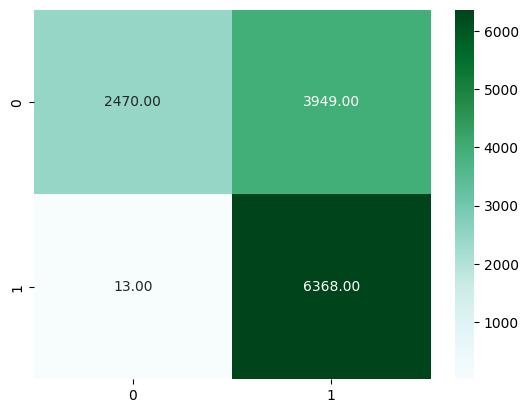

In [10]:
#Construimos y evaluamos maquinas de soporte vectorial con un kernel lineal y c=0.01
from sklearn.svm import SVC
# Creamos una instancia de Support vector classifier
model= SVC(kernel='linear', C=0.01)
# Entrenamos el modelo
model.fit(X_train_vectorized, y_train)
# Predecimos los valores correspondientes.
y_pred = model.predict(X_test_vectorized)
# Creamos la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='BuGn', fmt='.2f')
# Imprimimos el reporte de clasificación
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

    clickbait       0.98      0.81      0.89      6419
non-clickbait       0.84      0.99      0.91      6381

     accuracy                           0.90     12800
    macro avg       0.91      0.90      0.90     12800
 weighted avg       0.91      0.90      0.90     12800



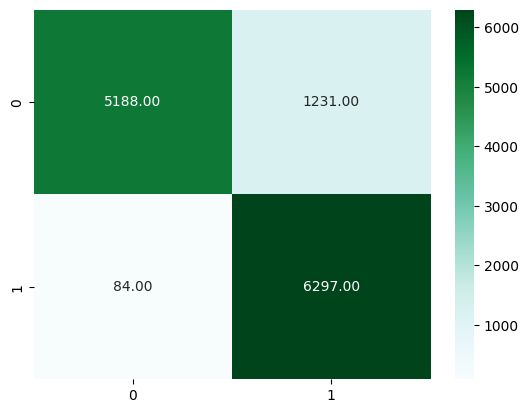

In [11]:
#Construimos y evaluamos maquinas de soporte vectorial con un kernel polinomial y degree=4
from sklearn.svm import SVC
# Creamos una instancia de Support vector classifier
model= SVC(kernel='poly', degree=4)
# Entrenamos el modelo
model.fit(X_train_vectorized, y_train)
# Predecimos los valores correspondientes.
y_pred = model.predict(X_test_vectorized)
# Creamos la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='BuGn', fmt='.2f')
# Imprimimos el reporte de clasificación
print(classification_report(y_test, y_pred))